In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qadence import *
 
import torch
from torch.autograd import grad

### Hyperparams

In [2]:
RANDOM_STATES =  [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795]  #np.random.randint(0, 2**31-1, size=10)
print("Seeds: ", RANDOM_STATES)
LEARNING_RATES = [0.01]
LEARNING_RATES2 = [0.005]

Seeds:  [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795]


### Inputs

In [3]:
def generate_chebyshev_grid(n, a, b, requires_grad=True):
    k = torch.arange(n)
    chebyshev_nodes = torch.cos(torch.pi * (2*k + 1) / (2*n))  #standard Chebyshev nodes in [-1,1]
    scaled_nodes = ((chebyshev_nodes + 1) / 2) * (b - a) + a  #rescale to [a, b]
    
    return scaled_nodes.requires_grad_(requires_grad=requires_grad)

# X train
N_POINTS = 20
x = generate_chebyshev_grid(N_POINTS, a=0.0, b=0.4)
print(x.detach().numpy())
cp_fixed = torch.reshape(x, (N_POINTS,1))

x1 = generate_chebyshev_grid(N_POINTS, a=0.0, b=0.4)
cp1 = torch.reshape(x1, (N_POINTS,1))
x2 = generate_chebyshev_grid(N_POINTS, a=0.6, b=0.9)
print(x2.detach().numpy())
cp2 = torch.reshape(x2, (N_POINTS,1))
cp_fixed2 = torch.concat((cp1,cp2), dim=0)

# X test
sample_points = generate_chebyshev_grid(100, a=0.0, b=0.9, requires_grad=False).reshape(-1, 1)

[0.39938347 0.39447398 0.38477591 0.37052803 0.35208119 0.32988961
 0.30449971 0.27653669 0.24668907 0.21569182 0.18430818 0.15331093
 0.12346331 0.09550029 0.07011039 0.04791881 0.02947197 0.01522409
 0.00552602 0.00061653]
[0.8995376  0.89585549 0.88858193 0.87789602 0.86406089 0.84741721
 0.82837478 0.80740251 0.7850168  0.76176886 0.73823114 0.7149832
 0.69259749 0.67162522 0.65258279 0.63593911 0.62210398 0.61141807
 0.60414451 0.6004624 ]


In [4]:
x_reg = torch.tensor([
    0.8284, 0.8074, 0.7618, 0.7382, 0.6005, 0.3994, 0.3945, 0.3848, 0.3705,
    0.3521, 0.3299, 0.3045, 0.2765, 0.2467, 0.2157, 0.1843, 0.1533, 0.1235,
    0.0955, 0.0701, 0.0479, 0.0295, 0.0152, 0.0055, 0.0006
])

### Pseudo-Exhaustive search

Seed id:  0
Learning rate:  0.01
Learning rate 2:  0.005
0 3.4269914396134005
50 0.04992049071019819
100 0.034634389161307164
150 0.02566150509296566


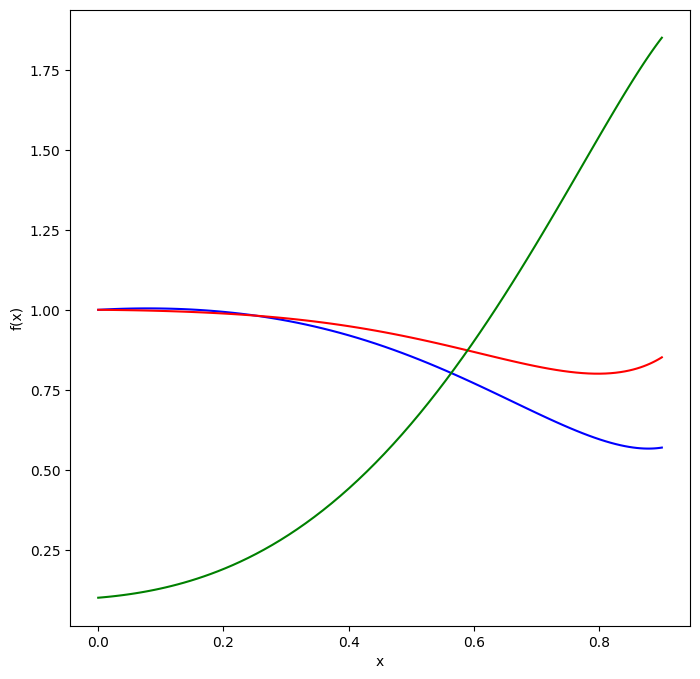

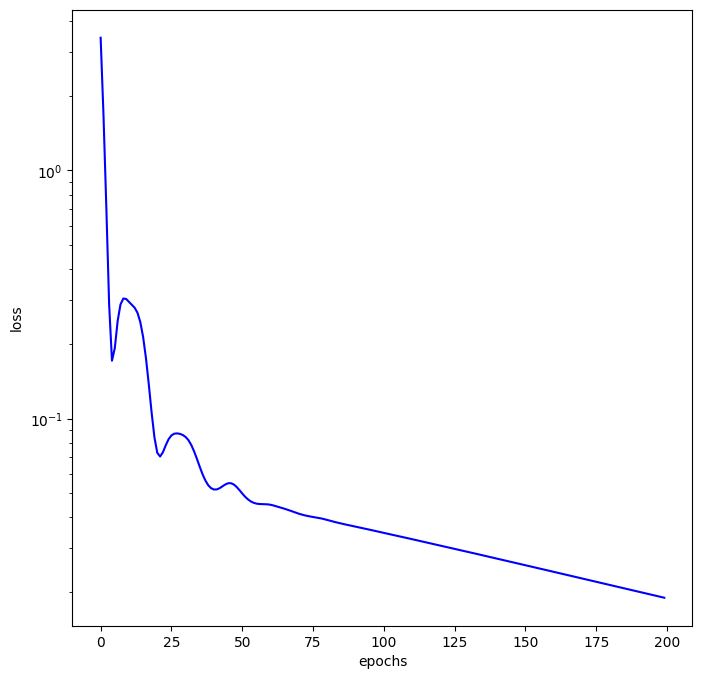

0 25.75903806888298
50 0.7319171256878445
100 0.44514783131671565
150 0.3786655796522275
200 0.3378332653697946
250 0.31171270214701685
300 0.2930564890520212
350 0.277836000806131
400 0.26499823608352846
450 0.2542051034512913
500 0.24508795795447777
550 0.23727644470902243


C:\Users\roman\AppData\Local\Temp\ipykernel_1776\1239290847.py:231: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


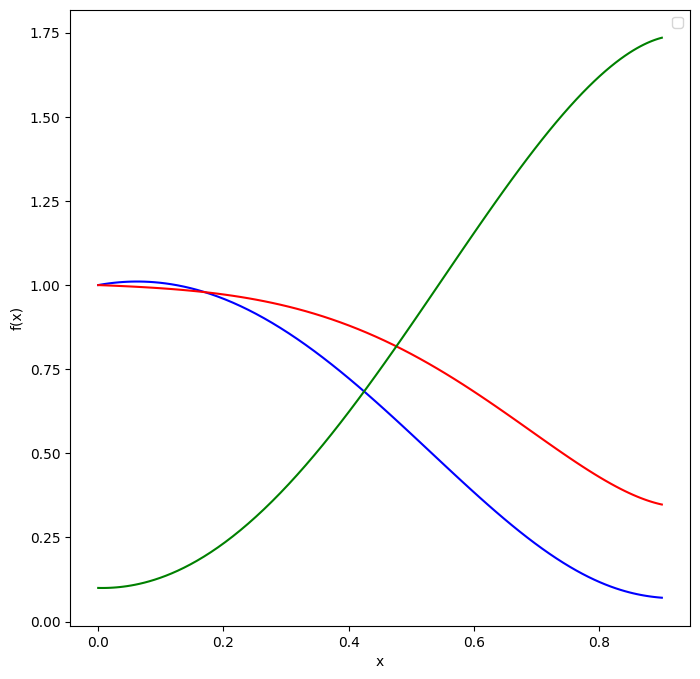

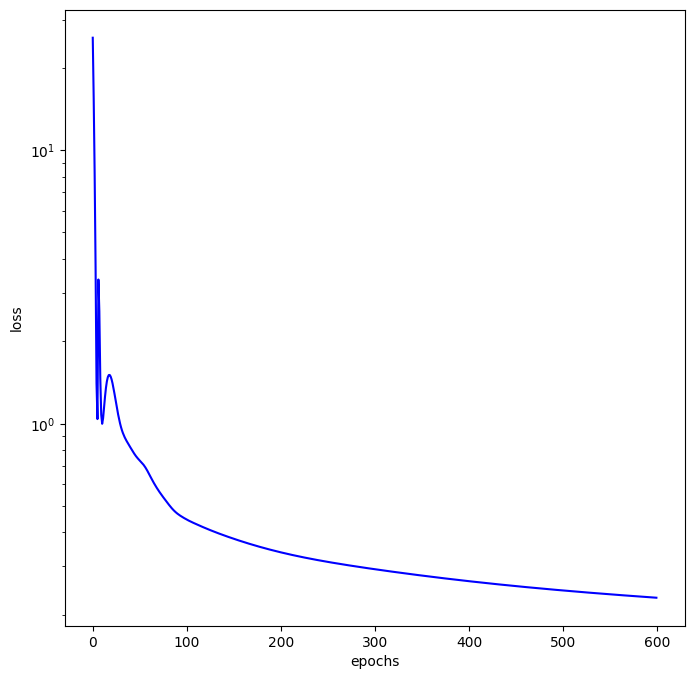

Seed id:  1
Learning rate:  0.01
Learning rate 2:  0.005
0 1.623005175972825
50 0.03481102556864873
100 0.020039714308329914
150 0.013332482899578014


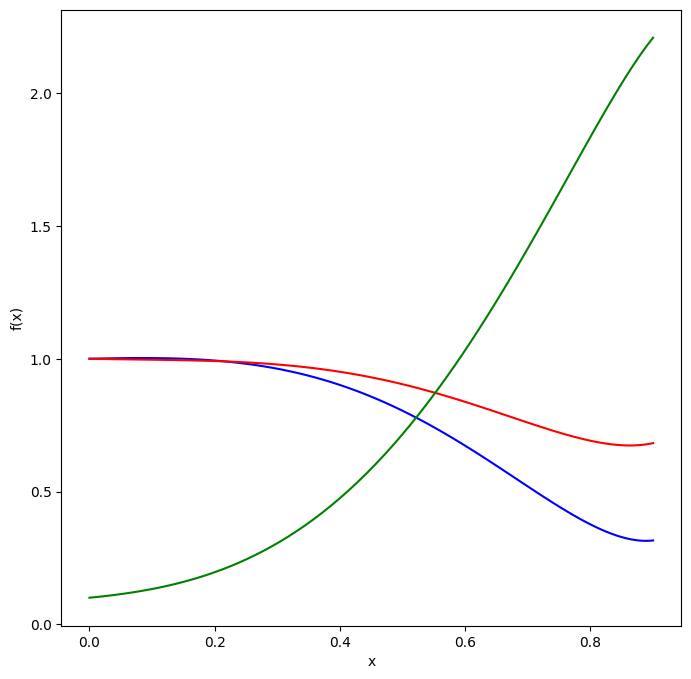

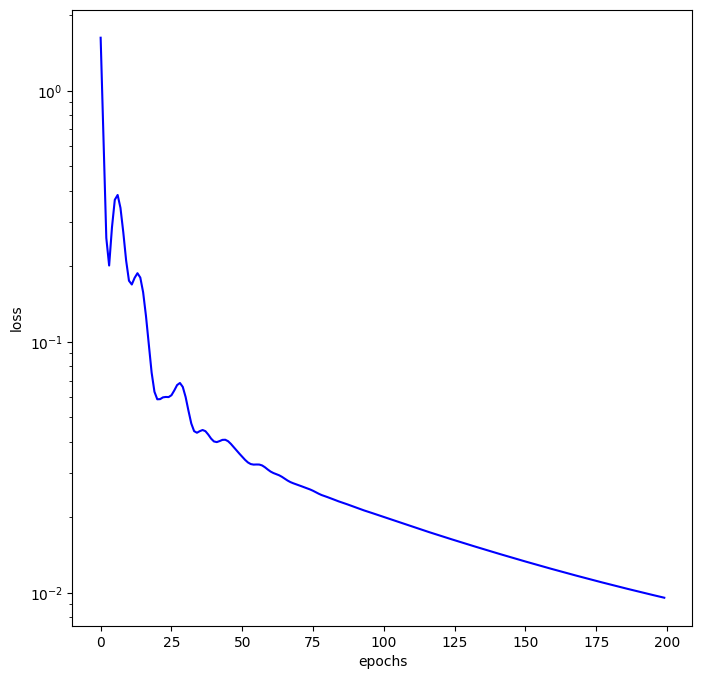

0 21.23287873465723
50 1.2821177414044402
100 0.9520699767507597
150 0.7987634403259288
200 0.6963713735640236
250 0.5944039663885812
300 0.48129662678086027
350 0.375345617398108
400 0.2979679657104324
450 0.2467159788076464
500 0.21220284387516058
550 0.18803653246548122


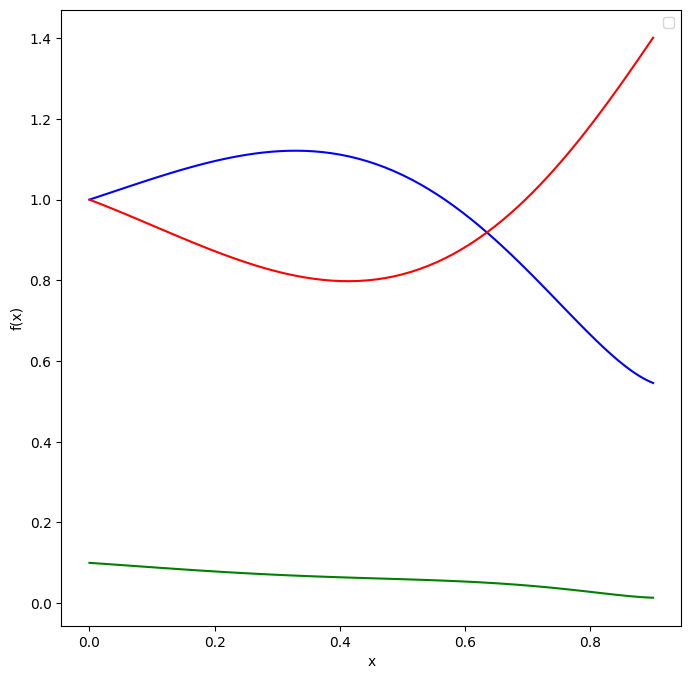

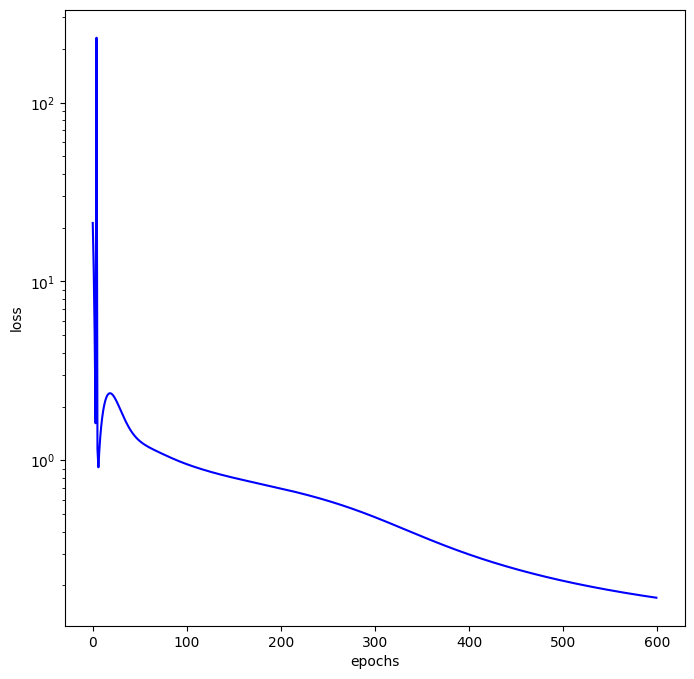

Seed id:  2
Learning rate:  0.01
Learning rate 2:  0.005
0 16.35731088364881
50 0.11581644763025517
100 0.04266741673863777
150 0.03609074165800927


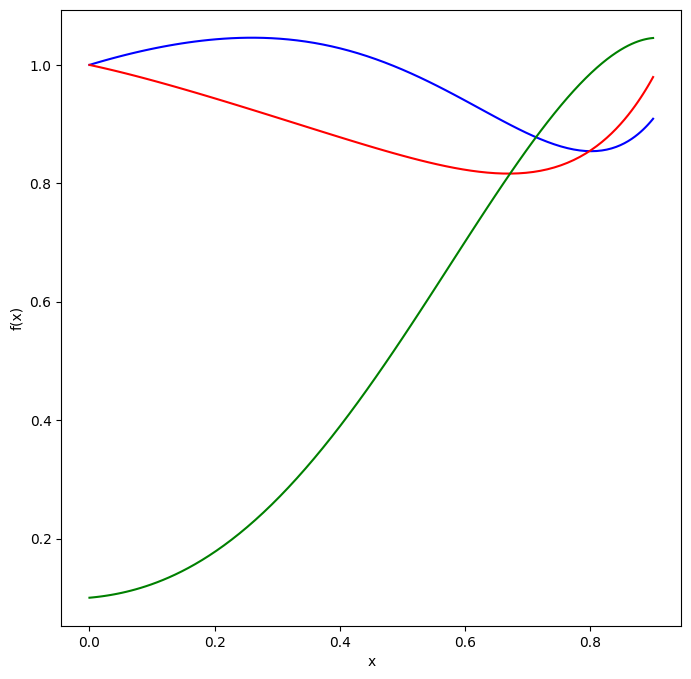

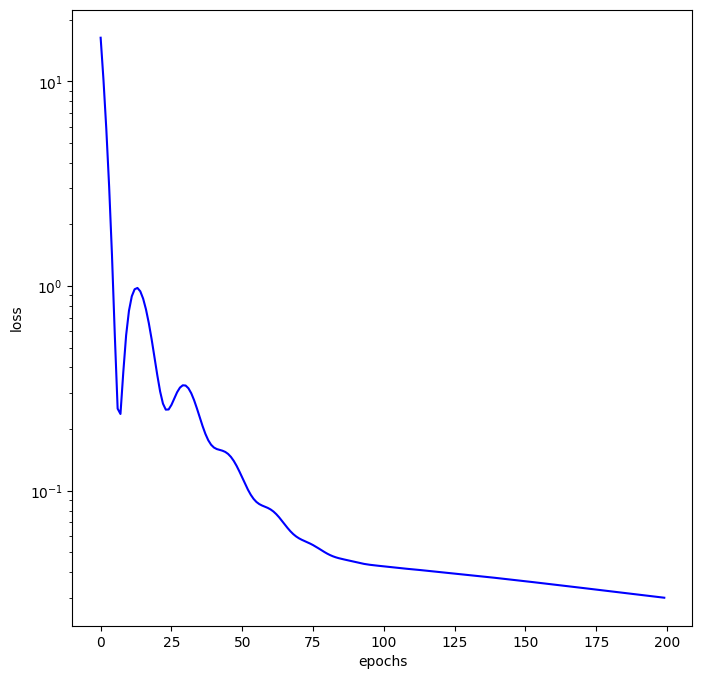

0 13.319681868911612
50 0.3259817210437486
100 0.1026899026912298
150 0.09720750001381366
200 0.09549914310732689
250 0.09459835670240845
300 0.09382401031653057
350 0.09309762251219288
400 0.09241803427932407
450 0.09178552057801993
500 0.09119788584075535
550 0.09065157155262692


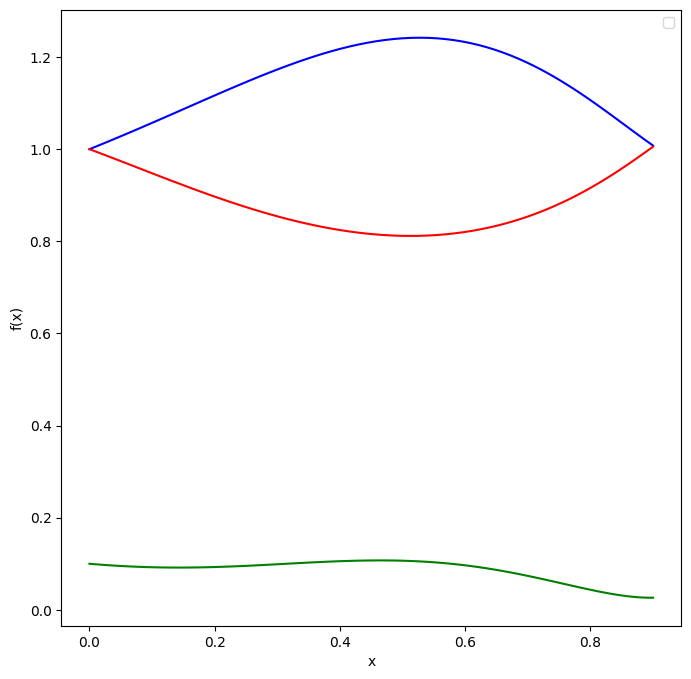

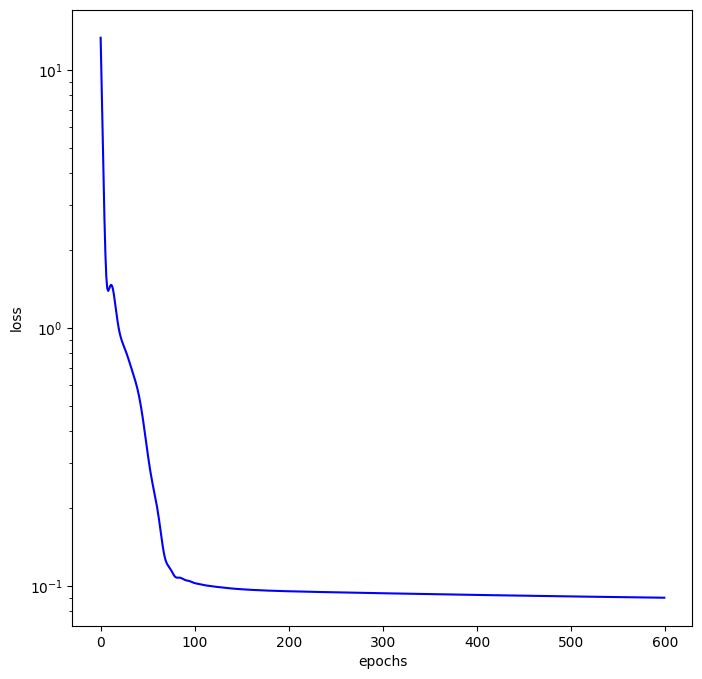

Seed id:  3
Learning rate:  0.01
Learning rate 2:  0.005
0 1.6280140217745607
50 0.034575413697252456
100 0.023821455594260414
150 0.01762843518252575


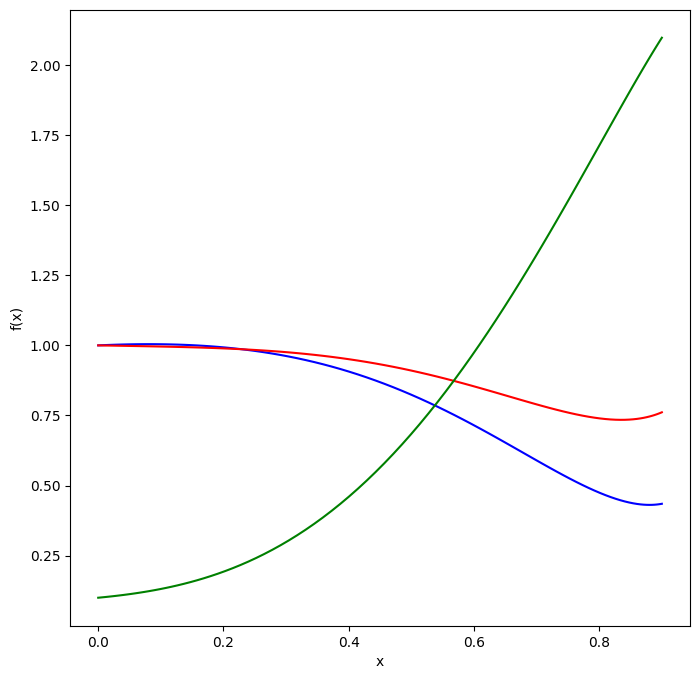

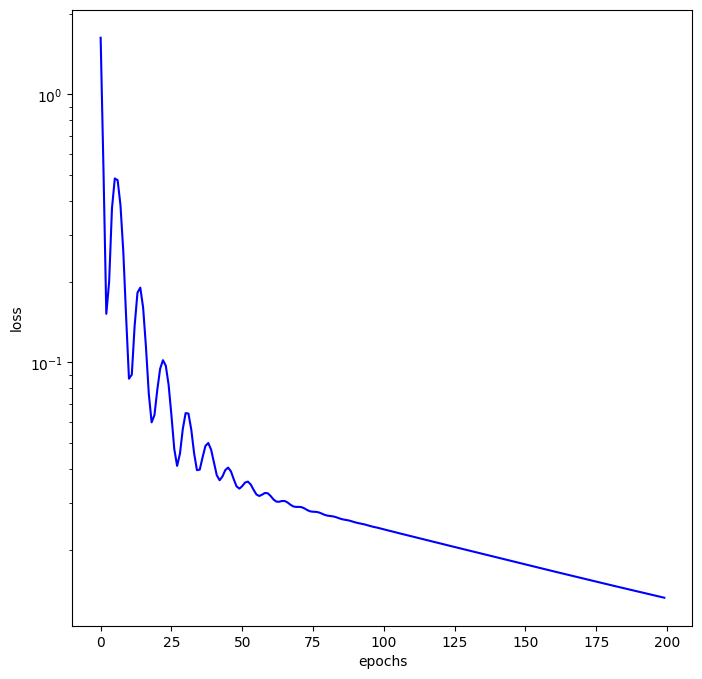

0 28.330411692008674
50 0.8266900509207202
100 0.5075232537820469
150 0.46131601915883524
200 0.43168658822387135
250 0.4053668570359315
300 0.38022892526449437
350 0.35707758600857653
400 0.3365872581245885
450 0.31884587703381195
500 0.30357873438273164
550 0.29039390493253914


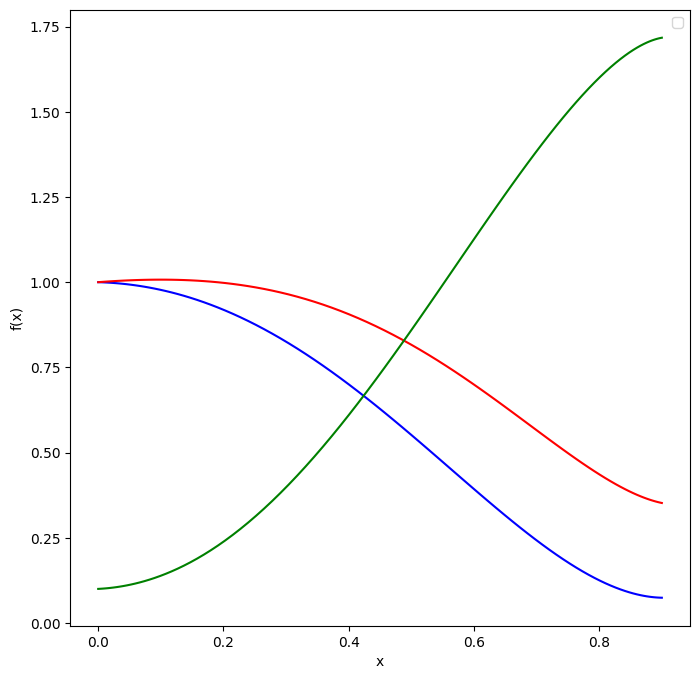

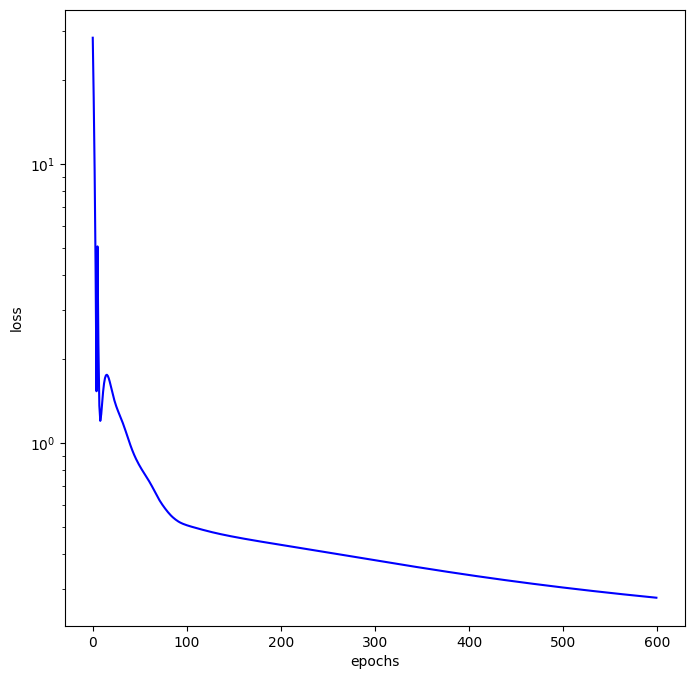

Seed id:  4
Learning rate:  0.01
Learning rate 2:  0.005
0 2.260137313251638
50 0.0498036389924959
100 0.03104630542072256
150 0.0205084128973541


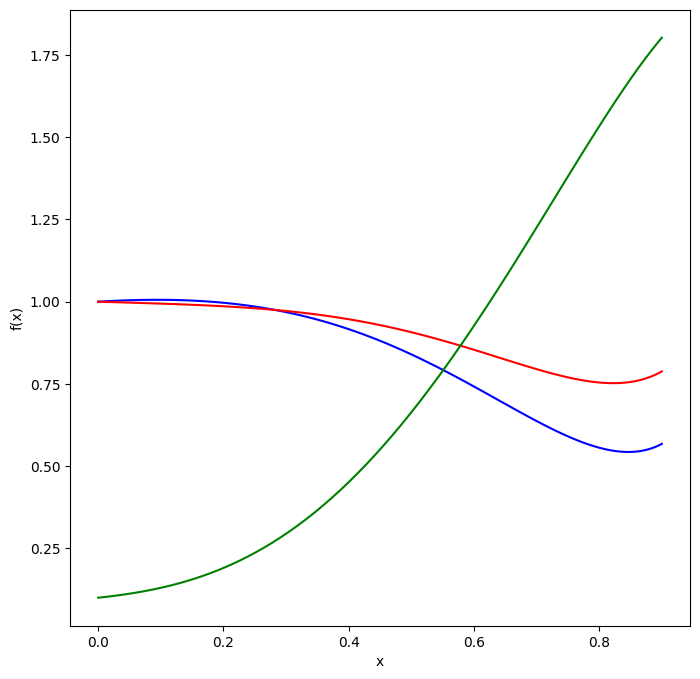

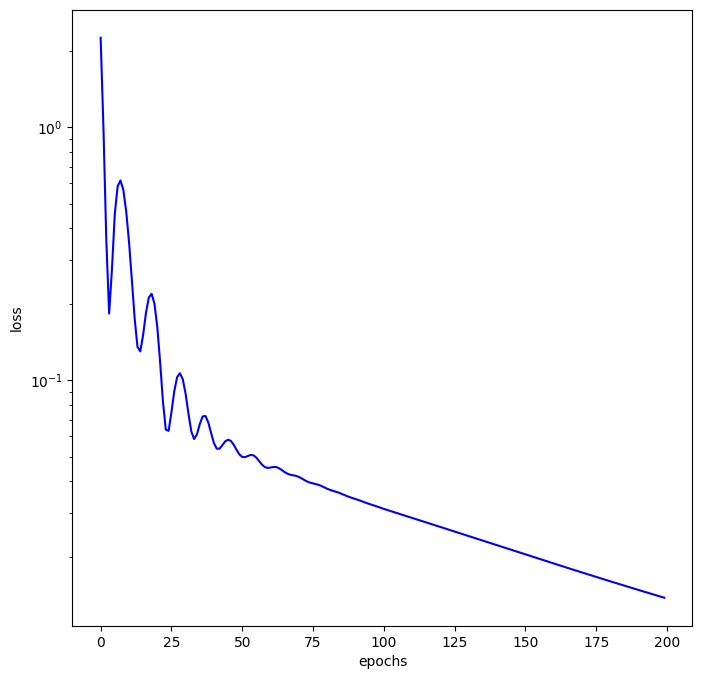

0 22.765334610340503
50 0.8043989663100622
100 0.5098449703318706
150 0.4753897303871354
200 0.44673788039917445
250 0.4149339076116256
300 0.3810077624003888
350 0.34771366965666917
400 0.31758744823997875
450 0.29187670367658025
500 0.27055878256690463
550 0.2530900628658591


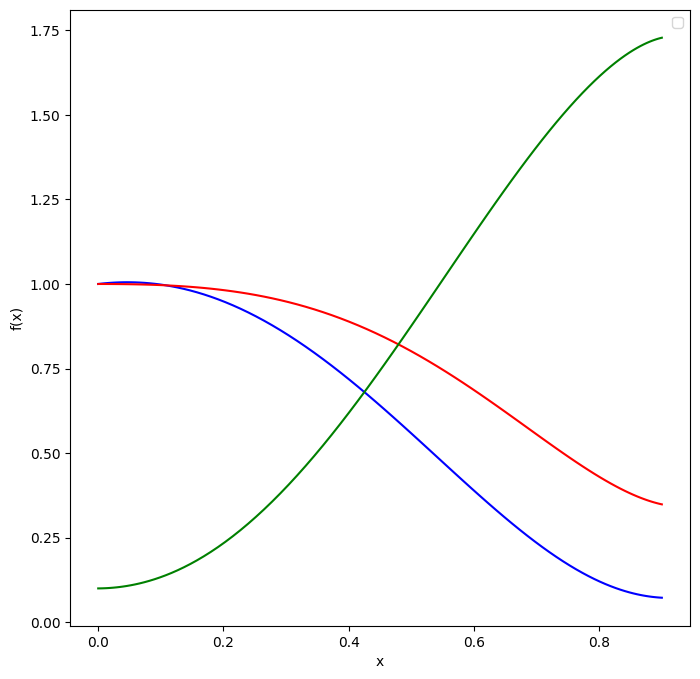

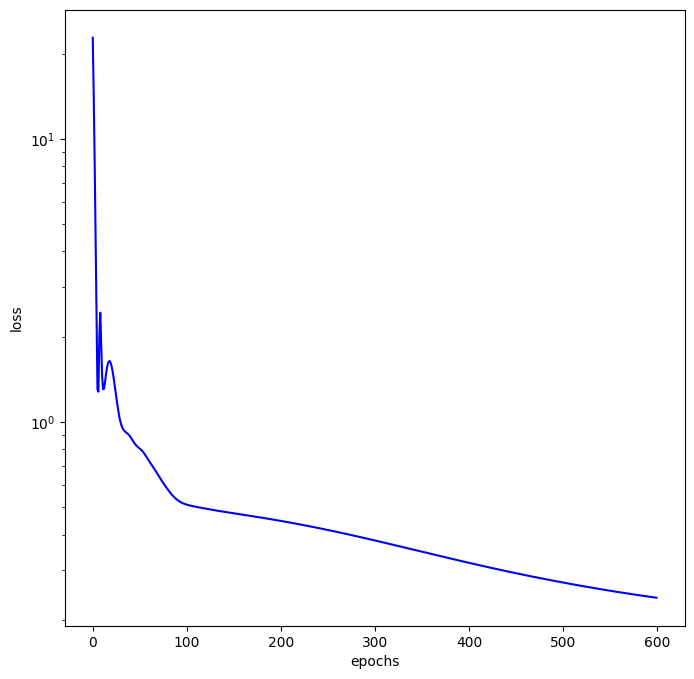

Seed id:  5
Learning rate:  0.01
Learning rate 2:  0.005
0 1.0610979192975438
50 0.038491469258991086
100 0.021443750521774753
150 0.013436974519797994


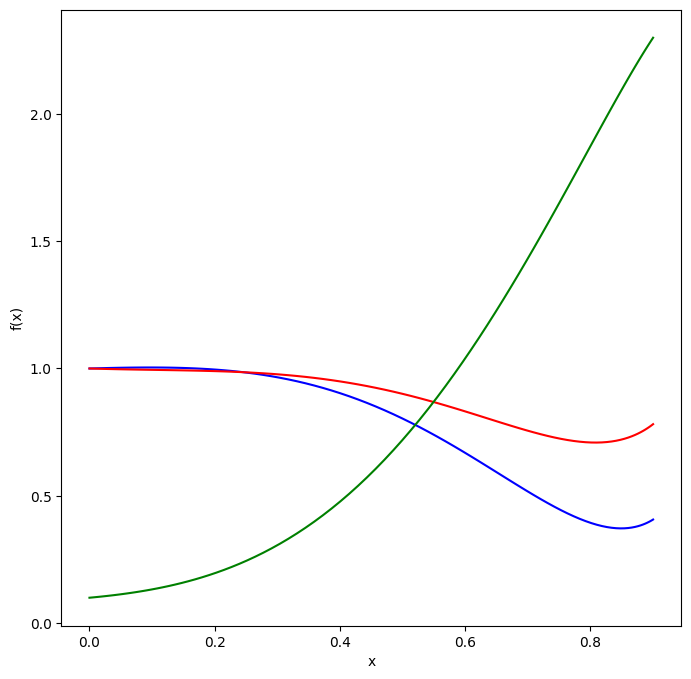

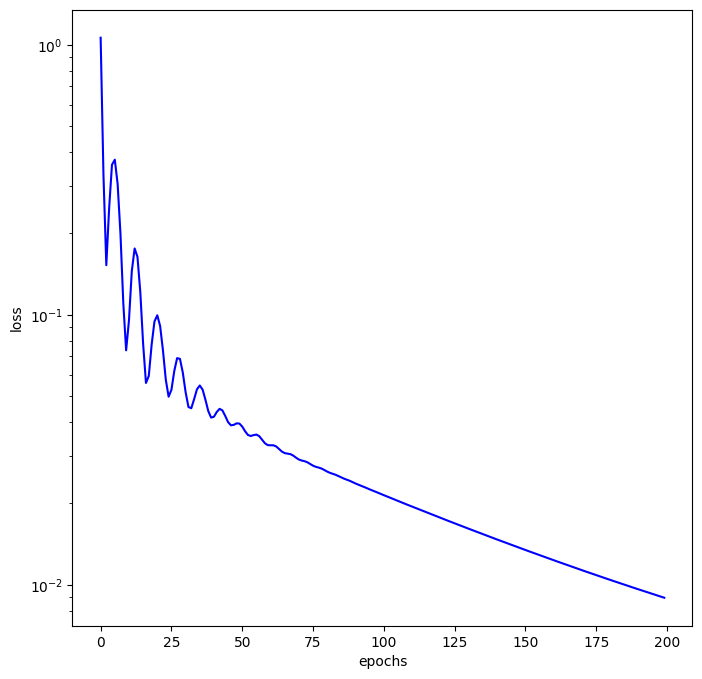

0 46.37199453759416
50 0.7560897997642574
100 0.5699008079203981
150 0.545968648523901
200 0.5221256428814292
250 0.4951004680465009
300 0.46569367414036034
350 0.43504405761670933
400 0.40454247700961465
450 0.37561069887585735
500 0.3493977716879543
550 0.3265521882951828


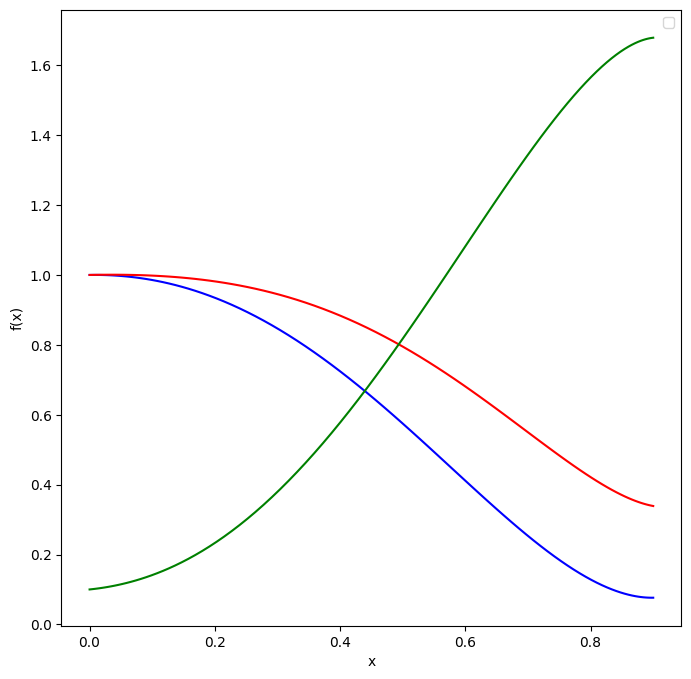

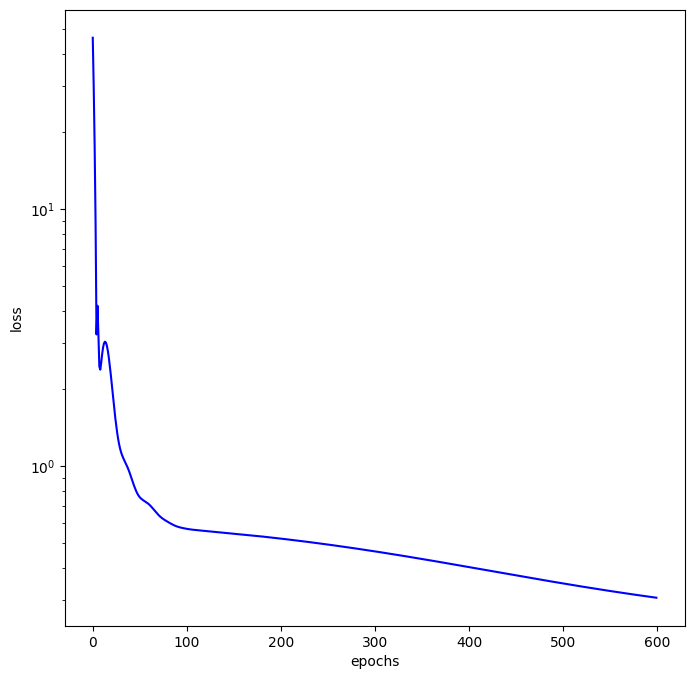

Seed id:  6
Learning rate:  0.01
Learning rate 2:  0.005
0 5.3953768700573725
50 0.04634778627381168
100 0.029088540557572942
150 0.022156416089425528


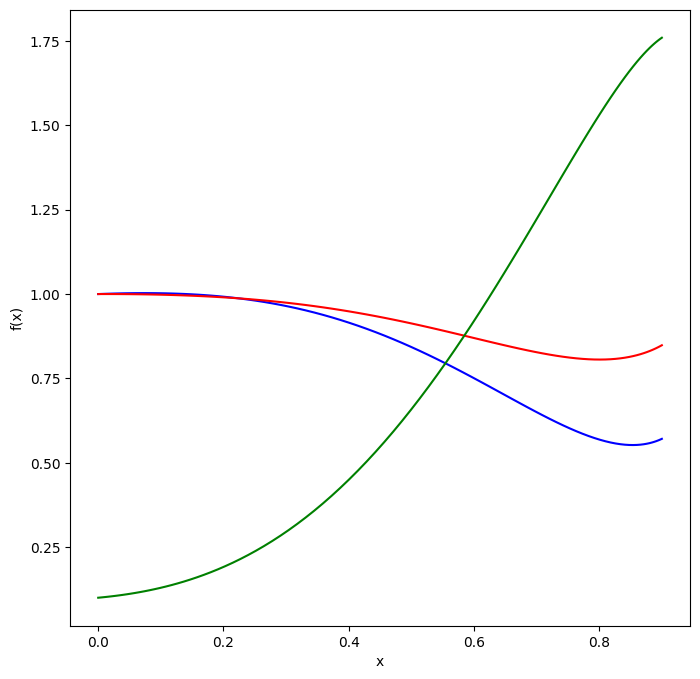

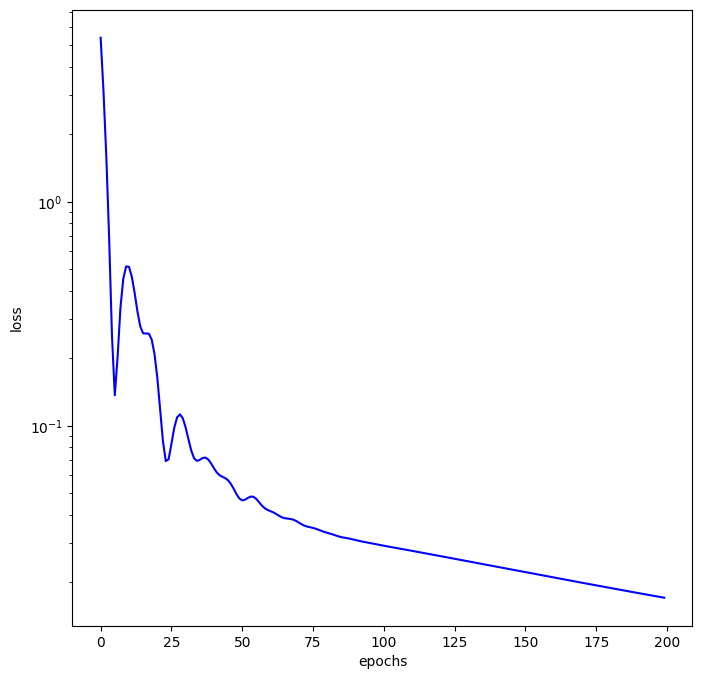

0 20.512841329913037
50 0.8697948324079311
100 0.5915239716409144
150 0.45452876541650444
200 0.3893587382602022
250 0.3285688055363586
300 0.2869144419926118
350 0.2630208429559643
400 0.24703491975383934
450 0.23470622396971713
500 0.2248147036827495
550 0.2167510896021787


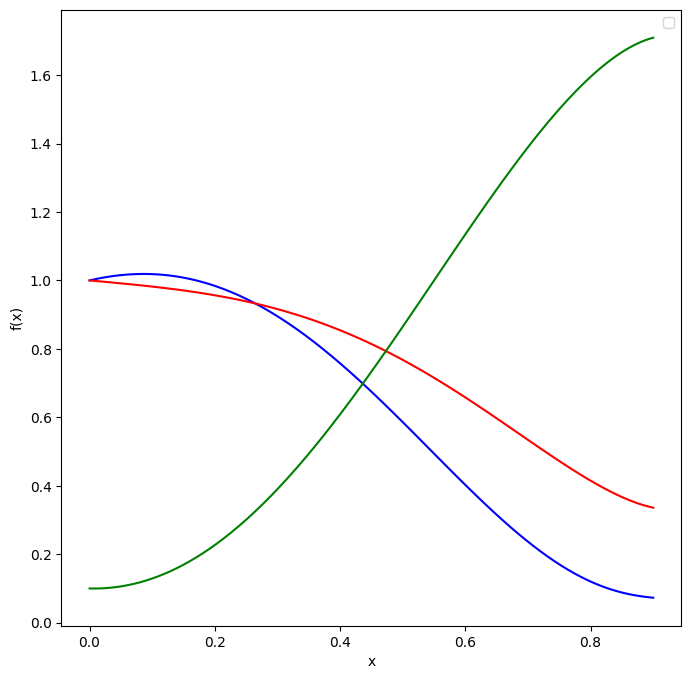

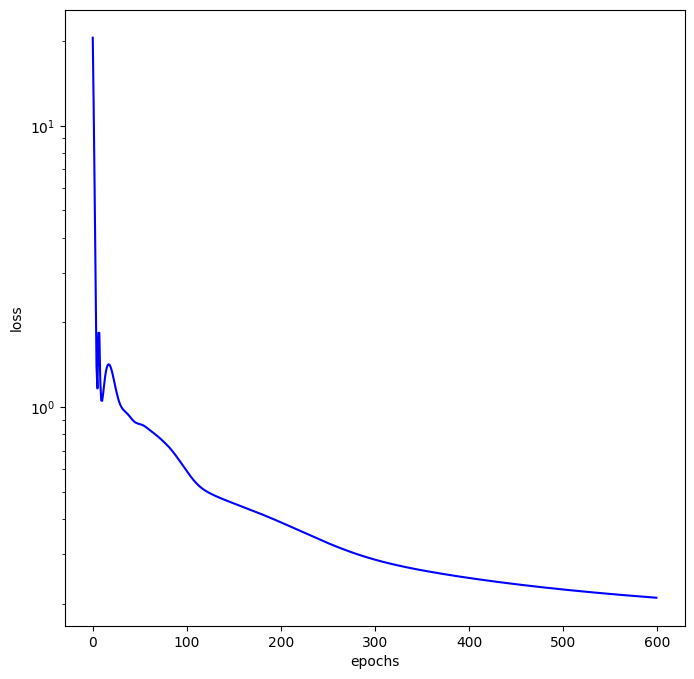

Seed id:  7
Learning rate:  0.01
Learning rate 2:  0.005
0 6.112107244888536
50 0.04877507099521034
100 0.03147959655337683
150 0.02486360804789859


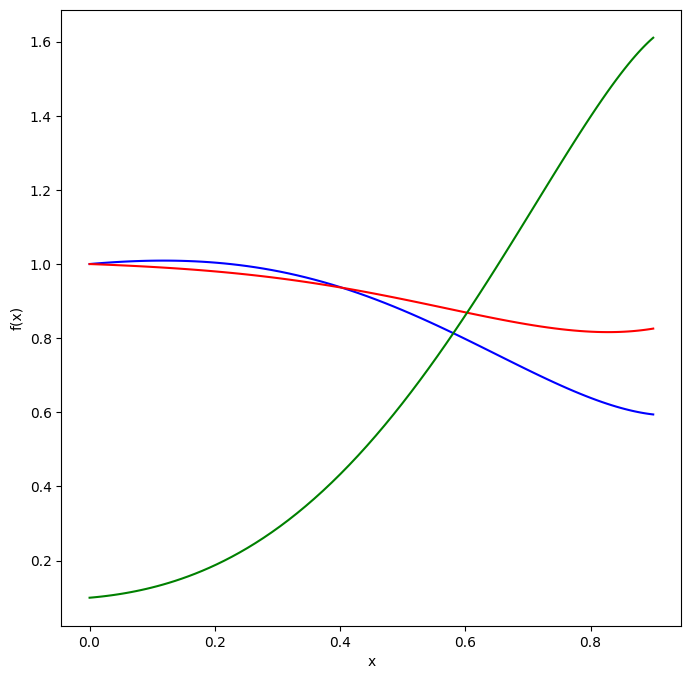

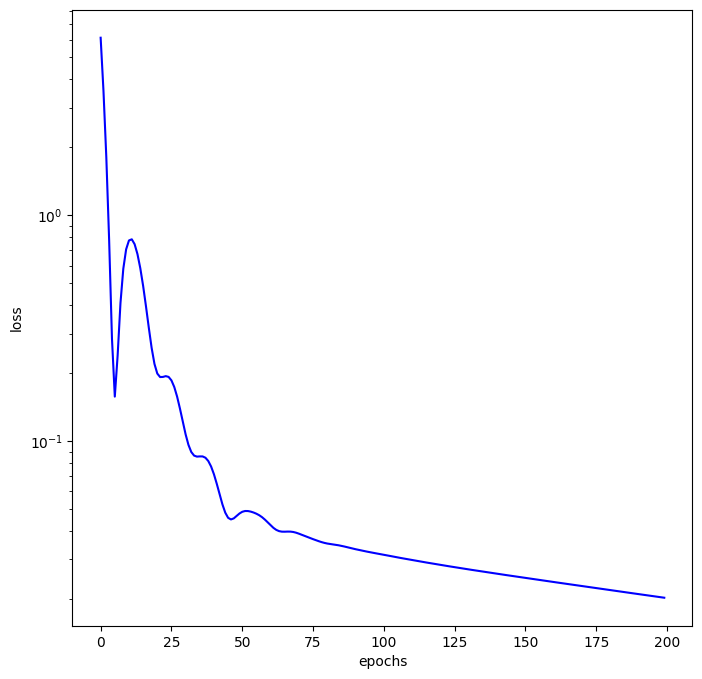

0 14.897261752176263
50 0.6771502288865869
100 0.3873999909050667
150 0.33120576162082827
200 0.29712810514779614
250 0.26961160501423753
300 0.2497775758380884
350 0.23496431583151273
400 0.22309556064806813
450 0.21330374195538027
500 0.2051217978079439
550 0.19821814206342486


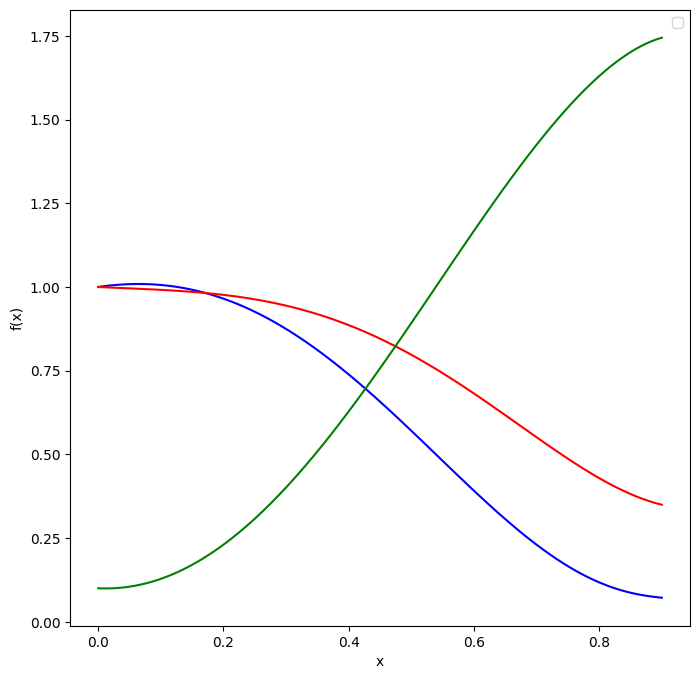

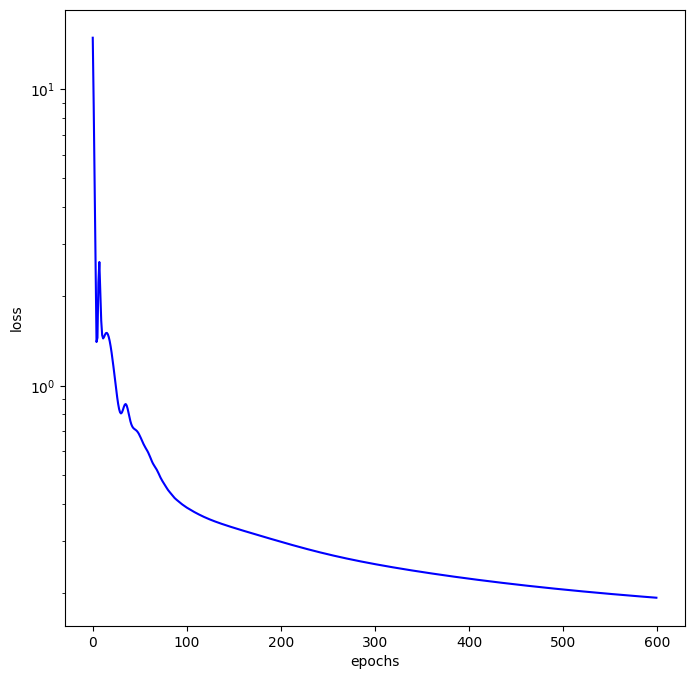

Seed id:  8
Learning rate:  0.01
Learning rate 2:  0.005
0 1.0490961677238384
50 0.03187731468815626
100 0.017391971878315093
150 0.011339957163141845


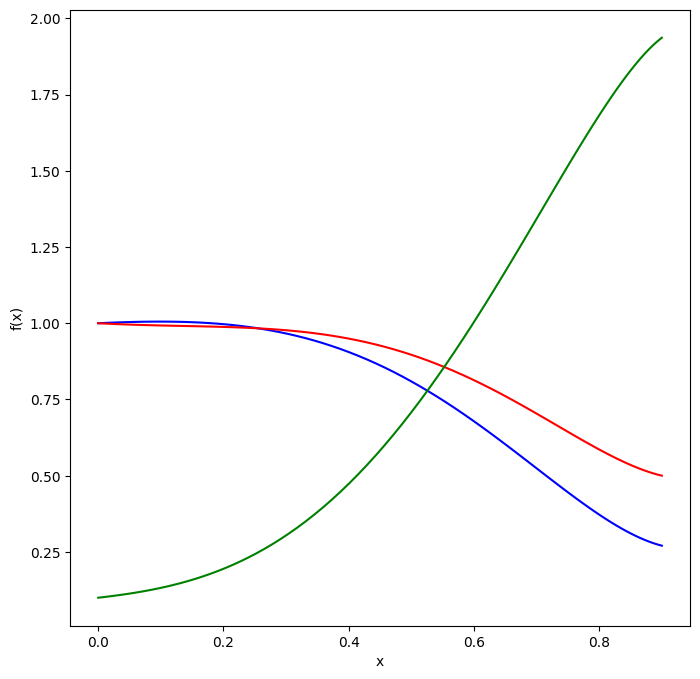

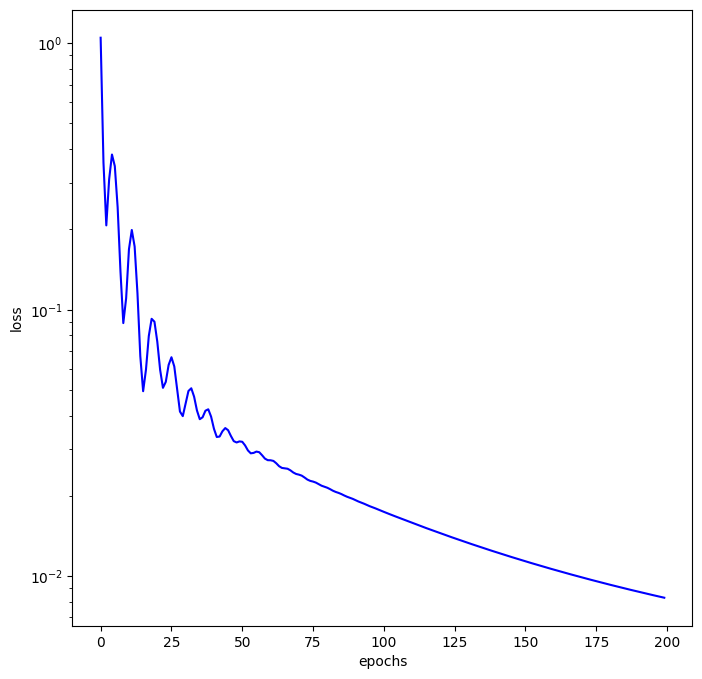

0 5.7838682513629465
50 0.678442086448233
100 0.35077243978607975
150 0.3109575149205693
200 0.2778839650020817
250 0.2501029820650692
300 0.2291438505028853
350 0.21422312433341356
400 0.20356127664386542
450 0.19571632913531592
500 0.18975645686742965
550 0.18507528630005726


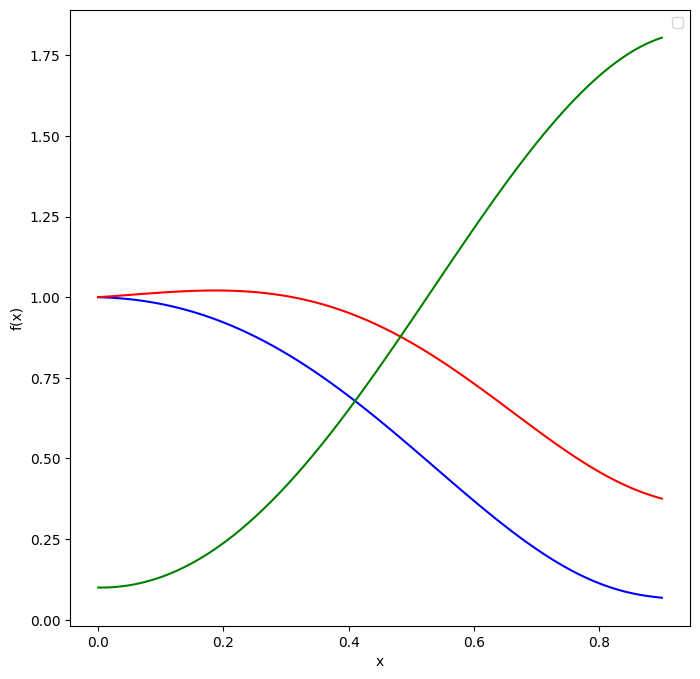

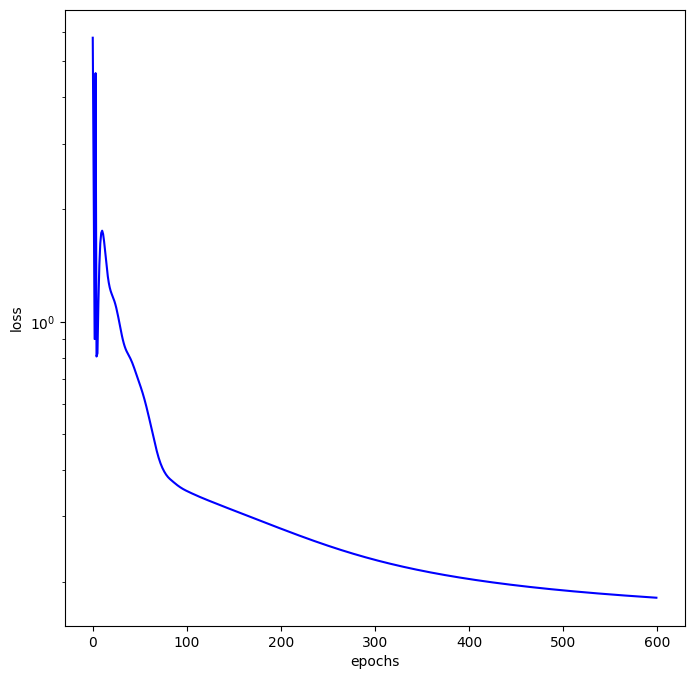

Seed id:  9
Learning rate:  0.01
Learning rate 2:  0.005
0 0.4068815604904892
50 0.019470285581709303
100 0.008489487816888488
150 0.005354320638775811


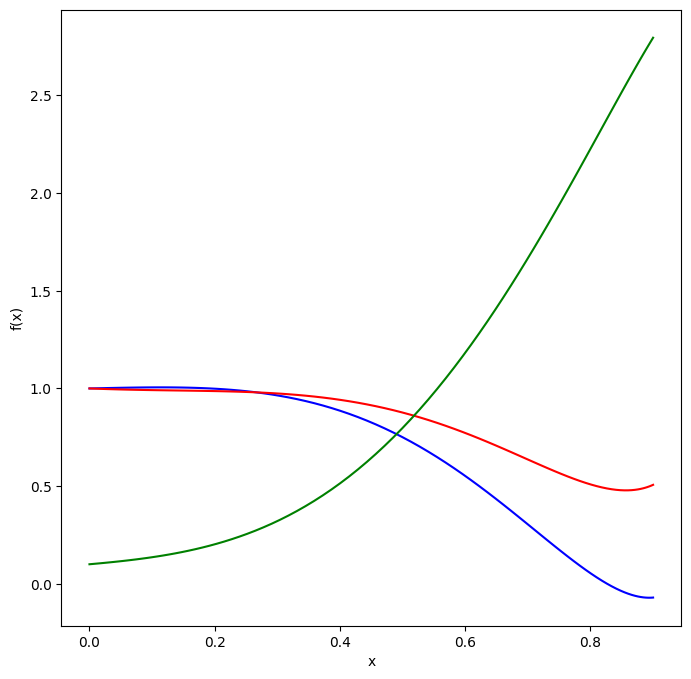

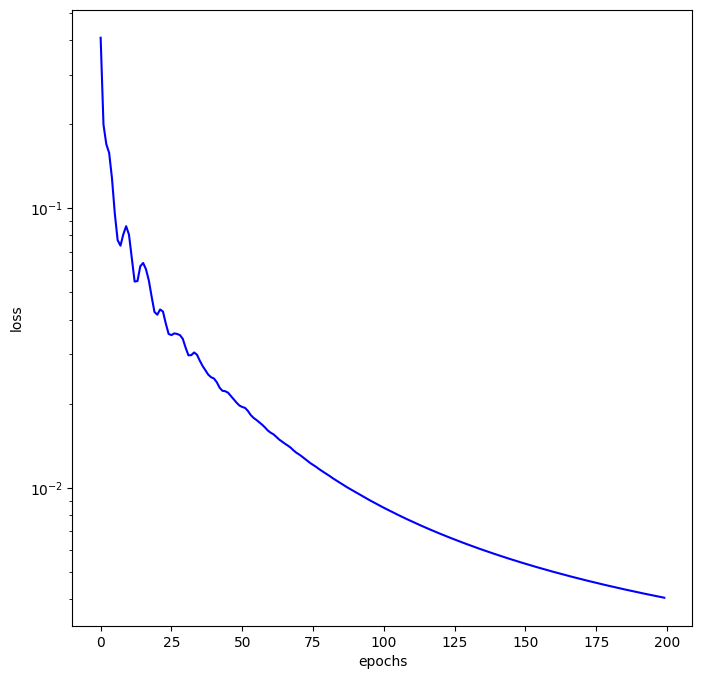

0 1181.3321320038456
50 4.780521392676876
100 3.7572045483049807
150 3.579372131784441
200 3.4894295850254315
250 3.4172229230717206
300 3.3542267536964596
350 3.2982907602351355
400 3.247254054316371
450 3.199055373798598
500 3.152046765321228
550 3.105063675344761


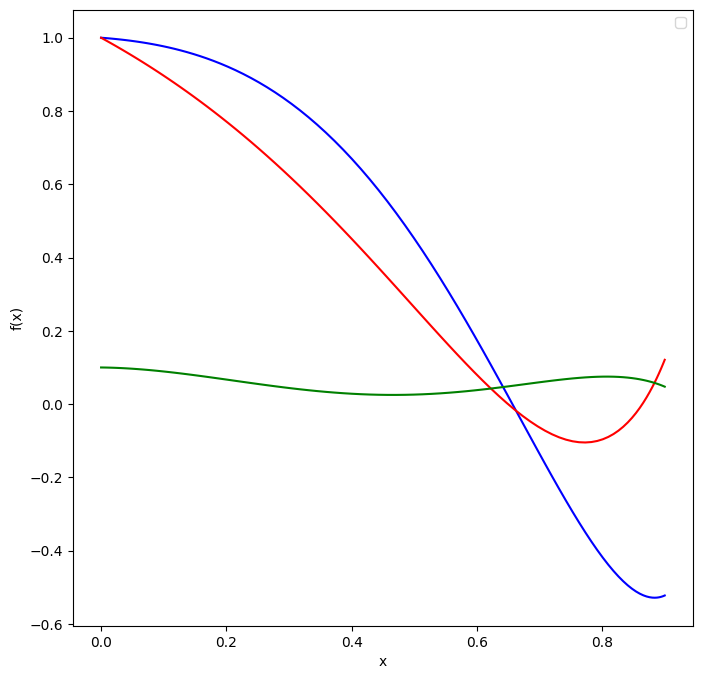

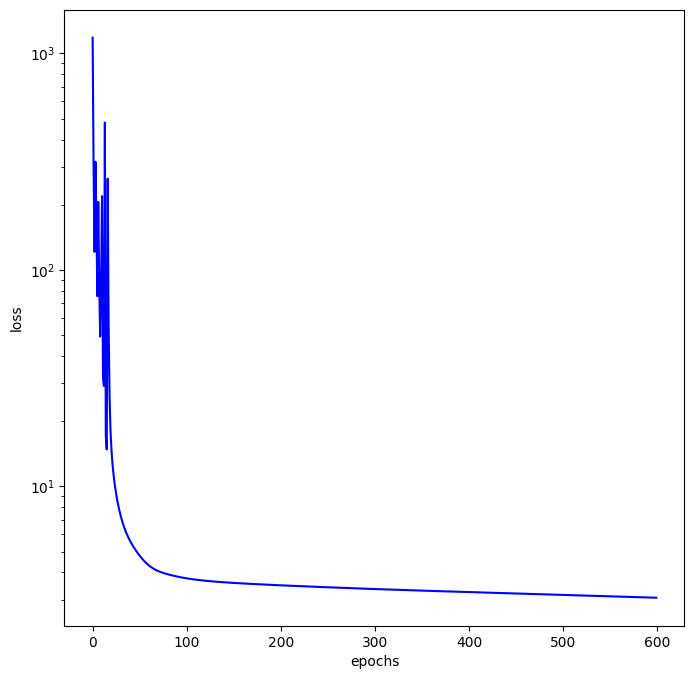

In [5]:
L_f = []
L_f2 = []
#L_q = []
all_functions = []
all_losses = []
all_losses2 = []
for state in range(len(RANDOM_STATES)):
    for lr in LEARNING_RATES:
        for lr2 in LEARNING_RATES2:
            print("Seed id: ",state)
            print("Learning rate: ",lr)
            print("Learning rate 2: ",lr2)


            ## SETTINGS ## 
            N_QUBITS, DEPTH, LEARNING_RATE, LEARNING_RATE2, N_POINTS = 6, 6, lr, lr2, N_POINTS
            p0 = 1
            t0 = 1
            v0 = 0.1

            cheb = feature_map(n_qubits=N_QUBITS, param="x", op=RY, fm_type = BasisSet.CHEBYSHEV)
            chebT = feature_map(n_qubits=N_QUBITS, param="x", op=RY, fm_type = BasisSet.CHEBYSHEV, reupload_scaling = ReuploadScaling.TOWER)
            fm = cheb

            torch.manual_seed(RANDOM_STATES[state])
            ansatz = hea(n_qubits=N_QUBITS, depth=DEPTH, operations=[RZ, RX, RZ])
            torch.manual_seed(RANDOM_STATES[state]) #TRY WITHOUT!
            ansatz2 = hea(n_qubits=N_QUBITS, depth=DEPTH, operations=[RZ, RX, RZ])
            torch.manual_seed(RANDOM_STATES[state]) #TRY WITHOUT!
            ansatz3 = hea(n_qubits=N_QUBITS, depth=DEPTH, operations=[RZ, RX, RZ])

            obs = total_magnetization(N_QUBITS) 
            obs2 = total_magnetization(N_QUBITS)
            obs3 = total_magnetization(N_QUBITS)

            circuit = QuantumCircuit(N_QUBITS, chain(fm, ansatz))
            circuit2 = QuantumCircuit(N_QUBITS, chain(fm, ansatz2))
            circuit3 = QuantumCircuit(N_QUBITS, chain(fm, ansatz3))
            model = QNN(circuit=circuit, observable=obs, inputs=["x"])
            model2 = QNN(circuit=circuit2, observable=obs2, inputs=["x"])
            model3 = QNN(circuit=circuit3, observable=obs3, inputs=["x"])

            inital_vparams = model.vparams
            #print("Inital params: ",inital_vparams)
            sorted_keys = sorted(inital_vparams.keys(), key=lambda k: int(k.split('_')[1]))
            inital_thetas = np.array([inital_vparams[k].item() for k in sorted_keys])
            inital_thetas = np.reshape(inital_thetas, (DEPTH, 3, N_QUBITS))
            Theta_init = np.transpose(inital_thetas, (2, 0, 1))
            theta_init = Theta_init.reshape(-1)
            #print("For Pennylane: ",theta_init)
            #check
            #Theta_init = np.reshape(theta_init, (N_QUBITS,DEPTH,3))
            #print("Theta: ",Theta_init)
            inital_vparams2 = model2.vparams
            #print("Inital params: ",inital_vparams2)
            sorted_keys2 = sorted(inital_vparams2.keys(), key=lambda k: int(k.split('_')[1]))
            inital_thetas2 = np.array([inital_vparams2[k].item() for k in sorted_keys2])
            inital_thetas2 = np.reshape(inital_thetas2, (DEPTH, 3, N_QUBITS))
            Theta_init2 = np.transpose(inital_thetas2, (2, 0, 1))
            theta_init2 = Theta_init2.reshape(-1)
            #print("For Pennylane: ",theta_init2)
            #check
            #Theta_init2 = np.reshape(theta_init2, (N_QUBITS,DEPTH,3))
            #print("Theta: ",Theta_init2)
            inital_vparams3 = model3.vparams
            #print("Inital params: ",inital_vparams3)
            sorted_keys3 = sorted(inital_vparams3.keys(), key=lambda k: int(k.split('_')[1]))
            inital_thetas3 = np.array([inital_vparams3[k].item() for k in sorted_keys3])
            inital_thetas3 = np.reshape(inital_thetas3, (DEPTH, 3, N_QUBITS))
            Theta_init3 = np.transpose(inital_thetas3, (2, 0, 1))
            theta_init3 = Theta_init3.reshape(-1)
            #print("For Pennylane: ",theta_init3)
            #check
            #Theta_init3 = np.reshape(theta_init3, (N_QUBITS,DEPTH,3))
            #print("Theta: ",Theta_init3)

            def loss_fn(inputs: torch.tensor, outputs: torch.tensor, outputs2: torch.tensor, outputs3: torch.tensor) -> torch.tensor:
                boundary_loss = p0*torch.ones_like(inputs) - model(torch.zeros_like(inputs))
                outputs = outputs + boundary_loss
                boundary_loss2 = t0*torch.ones_like(inputs) - model2(torch.zeros_like(inputs))
                outputs2 = outputs2 + boundary_loss2
                boundary_loss3 = v0*torch.ones_like(inputs) - model3(torch.zeros_like(inputs))
                outputs3 = outputs3 + boundary_loss3

                dp = grad(outputs=outputs.sum(), inputs=inputs, create_graph=True)[0]
                dt = grad(outputs=outputs2.sum(), inputs=inputs, create_graph=True)[0]
                dv = grad(outputs=outputs3.sum(), inputs=inputs, create_graph=True)[0]
                
                A = 1*torch.ones_like(inputs) + 4.95*torch.ones_like(inputs)*((2*inputs - 1*torch.ones_like(inputs)).pow(2))
                dA = 19.8*torch.ones_like(inputs)*(2*inputs - 1*torch.ones_like(inputs)) / A
                gamma = 1.4*torch.ones_like(inputs)
                continuity = -outputs*dv -outputs*outputs3*dA - outputs3*dp
                energy = -outputs3*dt -(gamma-1*torch.ones_like(inputs))*outputs2*(dv + outputs3*dA)
                momentum = -outputs3*dv - (1/gamma)*(dt + (outputs2/outputs)*dp)
    
                ode_loss = (continuity).pow(2)
                ode_loss2 = (energy).pow(2)
                ode_loss3 = (momentum).pow(2)
    
                return ode_loss.mean() + ode_loss2.mean() + ode_loss3.mean()


            ## TRAINING ##
            epochs = 200
            opt = torch.optim.Adam(list(model.parameters()) + list(model2.parameters()) +list(model3.parameters()), lr=LEARNING_RATE)
            losses = []
            for epoch in range(epochs):
                opt.zero_grad()
            
                #cp = torch.linspace(0.0, 0.4, N_POINTS, requires_grad=True) 
                #cp = torch.reshape(cp, (N_POINTS,1)) 
                cp = cp_fixed.clone().detach().requires_grad_(True)
                
                loss = loss_fn(inputs=cp, outputs=model(cp), outputs2=model2(cp), outputs3=model3(cp)) 
                losses.append(loss.item())
    
                if (epoch % 50 == 0):
                    print(epoch, loss.item())
                    
                loss.backward()
                opt.step()
            first_model = model
            second_model = model2
            third_model = model3


            ## INTERMEDIATE TESTING ##
            #sample_points = torch.linspace(0.0, 0.9, steps=100).reshape(-1, 1) 

            dqc_sol = (model(sample_points) - model(torch.zeros_like(sample_points))+p0*torch.ones_like(sample_points)).detach().numpy() 
            dqc_sol2 = (model2(sample_points) - model2(torch.zeros_like(sample_points))+t0*torch.ones_like(sample_points)).detach().numpy() 
            dqc_sol3 = (model3(sample_points) - model3(torch.zeros_like(sample_points))+v0*torch.ones_like(sample_points)).detach().numpy() 
            x_data = sample_points.detach().numpy()

            plt.figure(figsize=(8, 8))
            plt.plot(x_data, dqc_sol.flatten(), color="blue")
            plt.plot(x_data, dqc_sol2.flatten(), color="red")
            plt.plot(x_data, dqc_sol3.flatten(), color="green")
            plt.xlabel("x")
            plt.ylabel("f(x)")
            plt.savefig(f"inter_f_x_{state}_{lr}_{lr2}.png")
            plt.show()

            plt.figure(figsize=(8, 8))
            plt.plot(losses, color="blue")
            plt.xlabel("epochs")
            plt.ylabel("loss")
            plt.yscale('log')
            plt.savefig(f"inter_losses_{state}_{lr}_{lr2}.png")
            plt.show()


            ## TRAINING 2 ##
            def lin_reg(i: int, epochs: int):
                return 1 - np.tanh((i-150)/epochs) 
            def reg(inputs: torch.tensor, x_reg: torch.tensor, n_iter: int, epochs: int): 
                sigm = lin_reg(n_iter, epochs)
                reg_loss = sigm*((model(x_reg) - first_model(x_reg)).pow(2))
                reg_loss2 = sigm*((model2(x_reg) - second_model(x_reg)).pow(2))
                reg_loss3 = sigm*((model3(x_reg) - third_model(x_reg)).pow(2))

                return sum(reg_loss) + sum(reg_loss2) + sum(reg_loss3)
            def loss_fn2(inputs: torch.tensor, outputs: torch.tensor, outputs2: torch.tensor, outputs3: torch.tensor, x_reg: torch.tensor, i: int, epochs: int) -> torch.tensor:
                boundary_loss = p0*torch.ones_like(inputs) - model(torch.zeros_like(inputs))
                outputs = outputs + boundary_loss
                boundary_loss2 = t0*torch.ones_like(inputs) - model2(torch.zeros_like(inputs))
                outputs2 = outputs2 + boundary_loss2
                boundary_loss3 = v0*torch.ones_like(inputs) - model3(torch.zeros_like(inputs))
                outputs3 = outputs3 + boundary_loss3

                dp = grad(outputs=outputs.sum(), inputs=inputs, create_graph=True)[0]
                dt = grad(outputs=outputs2.sum(), inputs=inputs, create_graph=True)[0]
                dv = grad(outputs=outputs3.sum(), inputs=inputs, create_graph=True)[0]
                
                A = 1*torch.ones_like(inputs) + 4.95*torch.ones_like(inputs)*((2*inputs - 1*torch.ones_like(inputs)).pow(2))
                dA = 19.8*torch.ones_like(inputs)*(2*inputs - 1*torch.ones_like(inputs)) / A
                gamma = 1.4*torch.ones_like(inputs)
                continuity = -outputs*dv -outputs*outputs3*dA - outputs3*dp
                energy = -outputs3*dt -(gamma-1*torch.ones_like(inputs))*outputs2*(dv + outputs3*dA)
                momentum = -outputs3*dv - (1/gamma)*(dt + (outputs2/outputs)*dp)
    
                ode_loss = (continuity).pow(2)
                ode_loss2 = (energy).pow(2)
                ode_loss3 = (momentum).pow(2)
        
                return ode_loss.mean() + ode_loss2.mean() + ode_loss3.mean() + reg(inputs=inputs, x_reg=x_reg, n_iter=i, epochs=epochs)
            
            epochs = 600
            opt = torch.optim.Adam(list(model.parameters()) + list(model2.parameters()) +list(model3.parameters()), lr=LEARNING_RATE2)
            losses2 = []
            for epoch in range(epochs):
                opt.zero_grad()
            
                #cp1 = torch.linspace(0.0, 0.4, N_POINTS, requires_grad=True) 
                #cp1 = torch.reshape(cp1, (N_POINTS,1))
                #cp2 = torch.linspace(0.6, 0.9, N_POINTS, requires_grad=True) 
                #cp2 = torch.reshape(cp2, (N_POINTS,1))
                #cp = torch.concat((cp1,cp2), dim=0)
                cp = cp_fixed2.clone().detach().requires_grad_(True)
                if (epoch==0):
                    assert model.vparams == first_model.vparams
                    assert model2.vparams == second_model.vparams
                    assert model3.vparams == third_model.vparams
                loss = loss_fn2(inputs=cp, outputs=model(cp), outputs2=model2(cp), outputs3=model3(cp), x_reg=x_reg, i=epoch, epochs=epochs) 
                losses2.append(loss.item())
            
                if (epoch % 50 == 0):
                    print(epoch, loss.item())
                    
                loss.backward()
                opt.step()


            ## TESTING ##
            #sample_points = torch.linspace(0.0, 0.9, steps=100).reshape(-1, 1) 
       
            dqc_sol = (model(sample_points) - model(torch.zeros_like(sample_points))+p0*torch.ones_like(sample_points)).detach().numpy() 
            dqc_sol2 = (model2(sample_points) - model2(torch.zeros_like(sample_points))+t0*torch.ones_like(sample_points)).detach().numpy() 
            dqc_sol3 = (model3(sample_points) - model3(torch.zeros_like(sample_points))+v0*torch.ones_like(sample_points)).detach().numpy() 
            x_data = sample_points.detach().numpy()

            plt.figure(figsize=(8, 8))
            #plt.plot(x_data, analytic_sol.flatten(), color="gray", label="p(x)")
            plt.plot(x_data, dqc_sol.flatten(), color="blue")
            #plt.plot(x_data, analytic_sol2.flatten(), color="gray", label="T(x)")
            plt.plot(x_data, dqc_sol2.flatten(), color="red")
            #plt.plot(x_data, analytic_sol3.flatten(), color="gray", label="V(x)")
            plt.plot(x_data, dqc_sol3.flatten(), color="green")
            plt.xlabel("x")
            plt.ylabel("f(x)")
            plt.legend()
            plt.savefig(f"f_x_{state}_{lr}_{lr2}.png")
            plt.show()

            plt.figure(figsize=(8, 8))
            plt.plot(losses2, color="blue")
            plt.xlabel("epochs")
            plt.ylabel("loss")
            plt.yscale('log')
            plt.savefig(f"losses_{state}_{lr}_{lr2}.png")
            plt.show()
            
            L_f.append(losses[-1])
            L_f2.append(losses2[-1])
            #L_q.append((torch.sum((analytic_sol-dqc_sol)**2) /len(sample_points), torch.sum((analytic_sol2-dqc_sol2)**2) /len(sample_points)))
            all_functions.append((dqc_sol.flatten(), dqc_sol2.flatten(), dqc_sol3.flatten()))
            all_losses.append(losses)
            all_losses2.append(losses2)

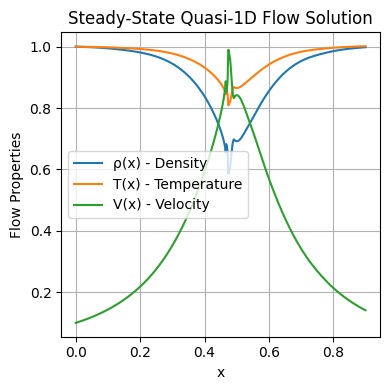

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Constants
gamma = 1.4

# Area function and its derivative
def A(x):
    return 1 + 4.95 * (2*x - 1)**2

def dlnA_dx(x):
    return (4.95 * 4 * (2*x - 1)) / A(x)

# Define the system of ODEs in steady state
def steady_quasi1D(x, y):
    rho, T, V = y
    denom = T - V**2
    d_rho_dx = (rho * V**2 * dlnA_dx(x)) / denom
    d_T_dx = (T * V**2 * (gamma - 1) * dlnA_dx(x)) / denom
    d_V_dx = - (T * V * dlnA_dx(x)) / denom
    return [d_rho_dx, d_T_dx, d_V_dx]

# Initial conditions
rho0 = 1.0
T0 = 1.0
V0 = 0.1
y0 = [rho0, T0, V0]

# Integration range
x_span = (0, 0.9)
x_eval = np.linspace(x_span[0], x_span[1], 1000)

# Solve the ODE system
sol = solve_ivp(steady_quasi1D, x_span, y0, t_eval=x_eval, method='RK45')

# Plot the results
plt.figure(figsize=(4, 4))
plt.plot(sol.t, sol.y[0], label='ρ(x) - Density')
plt.plot(sol.t, sol.y[1], label='T(x) - Temperature')
plt.plot(sol.t, sol.y[2], label='V(x) - Velocity')
plt.xlabel('x')
plt.ylabel('Flow Properties')
plt.title('Steady-State Quasi-1D Flow Solution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


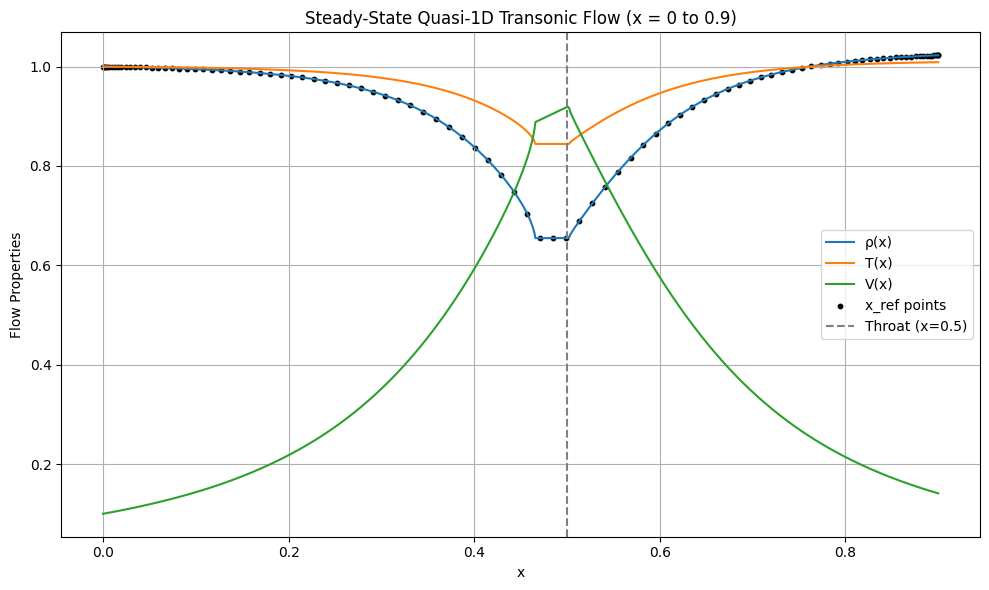

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Constants
gamma = 1.4
epsilon = 1e-6  # small offset to avoid division by zero

# Area function and its derivative
def A(x):
    return 1 + 4.95 * (2*x - 1)**2

def dlnA_dx(x):
    return (4.95 * 4 * (2*x - 1)) / A(x)

# Governing ODEs for steady quasi-1D flow
def steady_quasi1D(x, y):
    rho, T, V = y
    denom = T - V**2
    denom = denom if abs(denom) > epsilon else np.sign(denom) * epsilon
    d_rho_dx = (rho * V**2 * dlnA_dx(x)) / denom
    d_T_dx = (T * V**2 * (gamma - 1) * dlnA_dx(x)) / denom
    d_V_dx = - (T * V * dlnA_dx(x)) / denom
    return [d_rho_dx, d_T_dx, d_V_dx]

# Initial conditions at x = 0
y0 = [1.0, 1.0, 0.1]

# Step 1: Integrate from x = 0 to x = 0.5 (subsonic)
x_sub = np.linspace(0, 0.5, 500)
sol_sub = solve_ivp(steady_quasi1D, (x_sub[0], x_sub[-1]), y0, t_eval=x_sub, method='Radau')

# Step 2: Smooth sonic patch at x = 0.5
rho_throat = sol_sub.y[0, -1]
T_exact = sol_sub.y[1, -1]
V_throat = np.sqrt(T_exact) * 0.9999
T_throat = V_throat**2 + epsilon
y_throat = [rho_throat, T_throat, V_throat]

# Step 3: Integrate from x = 0.5001 to x = 0.9 (supersonic)
x_sup = np.linspace(0.5001, 0.9, 500)
sol_sup = solve_ivp(steady_quasi1D, (x_sup[0], x_sup[-1]), y_throat, t_eval=x_sup, method='Radau')

# Step 4: Combine subsonic and supersonic branches
x_full = np.concatenate((sol_sub.t, sol_sup.t))
rho_full = np.concatenate((sol_sub.y[0], sol_sup.y[0]))
T_full = np.concatenate((sol_sub.y[1], sol_sup.y[1]))
V_full = np.concatenate((sol_sub.y[2], sol_sup.y[2]))

# Step 5: Clean out invalid values
valid_idx = ~(
    np.isnan(x_full) | np.isnan(rho_full) | np.isnan(T_full) | np.isnan(V_full) |
    np.isinf(x_full) | np.isinf(rho_full) | np.isinf(T_full) | np.isinf(V_full)
)
x_clean = x_full[valid_idx]
rho_clean = rho_full[valid_idx]
T_clean = T_full[valid_idx]
V_clean = V_full[valid_idx]

# Step 6: Reference points to sample at
x_ref = np.array([
    8.9994e-01, 8.9950e-01, 8.9861e-01, 8.9728e-01, 8.9551e-01, 8.9330e-01,
    8.9065e-01, 8.8757e-01, 8.8405e-01, 8.8011e-01, 8.7574e-01, 8.7095e-01,
    8.6575e-01, 8.6013e-01, 8.5411e-01, 8.4769e-01, 8.4088e-01, 8.3369e-01,
    8.2611e-01, 8.1817e-01, 8.0986e-01, 8.0119e-01, 7.9218e-01, 7.8283e-01,
    7.7316e-01, 7.6316e-01, 7.5286e-01, 7.4225e-01, 7.3136e-01, 7.2019e-01,
    7.0875e-01, 6.9706e-01, 6.8512e-01, 6.7296e-01, 6.6057e-01, 6.4797e-01,
    6.3518e-01, 6.2221e-01, 6.0906e-01, 5.9576e-01, 5.8232e-01, 5.6874e-01,
    5.5505e-01, 5.4125e-01, 5.2737e-01, 5.1341e-01, 4.9938e-01, 4.8531e-01,
    4.7120e-01, 4.5707e-01, 4.4293e-01, 4.2880e-01, 4.1469e-01, 4.0062e-01,
    3.8659e-01, 3.7263e-01, 3.5875e-01, 3.4495e-01, 3.3126e-01, 3.1768e-01,
    3.0424e-01, 2.9094e-01, 2.7779e-01, 2.6482e-01, 2.5203e-01, 2.3943e-01,
    2.2704e-01, 2.1488e-01, 2.0294e-01, 1.9125e-01, 1.7981e-01, 1.6864e-01,
    1.5775e-01, 1.4714e-01, 1.3684e-01, 1.2684e-01, 1.1717e-01, 1.0782e-01,
    9.8806e-02, 9.0142e-02, 8.1833e-02, 7.3887e-02, 6.6312e-02, 5.9116e-02,
    5.2305e-02, 4.5888e-02, 3.9869e-02, 3.4254e-02, 2.9050e-02, 2.4262e-02,
    1.9893e-02, 1.5949e-02, 1.2434e-02, 9.3497e-03, 6.7008e-03, 4.4894e-03,
    2.7176e-03, 1.3872e-03, 4.9956e-04, 5.5515e-05
])

# Step 7: Interpolate solution at reference points
rho_list = interp1d(x_clean, rho_clean, fill_value="extrapolate")(x_ref).tolist()
T_list = interp1d(x_clean, T_clean, fill_value="extrapolate")(x_ref).tolist()
V_list = interp1d(x_clean, V_clean, fill_value="extrapolate")(x_ref).tolist()

# Step 8: Plot solution
plt.figure(figsize=(10, 6))
plt.plot(x_clean, rho_clean, label='ρ(x)', color='tab:blue')
plt.plot(x_clean, T_clean, label='T(x)', color='tab:orange')
plt.plot(x_clean, V_clean, label='V(x)', color='tab:green')
plt.scatter(x_ref, rho_list, s=10, color='black', label='x_ref points')
plt.axvline(x=0.5, linestyle='--', color='gray', label='Throat (x=0.5)')
plt.xlabel("x")
plt.ylabel("Flow Properties")
plt.title("Steady-State Quasi-1D Transonic Flow (x = 0 to 0.9)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


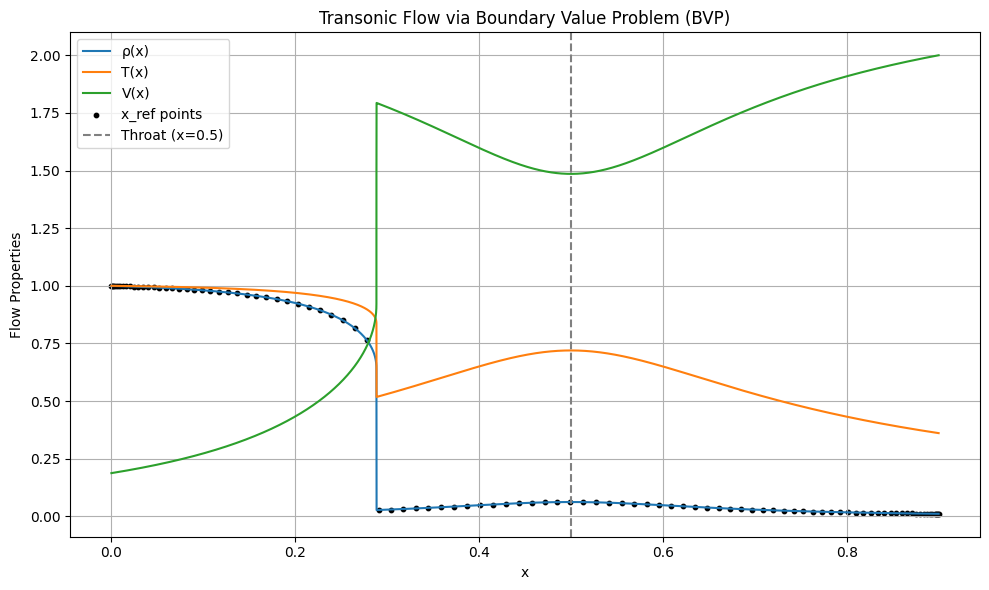

([0.011082718704425195,
  0.011103116248880397,
  0.01114453268387204,
  0.011206819147804286,
  0.011290454007671154],
 [0.3610133204576586,
  0.36127895209648364,
  0.36181740513864913,
  0.36262493464007034,
  0.3637050062348355],
 [1.9999547253524663,
  1.9996226512396784,
  1.9989493451662186,
  1.9979391487747054,
  1.9965872089927088])

In [8]:
# Redefine and solve the BVP with correct imports and structure

from scipy.integrate import solve_bvp
from scipy.interpolate import interp1d

# Redefine ODE system and boundary conditions (already defined previously)
def quasi1D_ODE(x, y):
    rho, T, V = y
    denom = T - V**2
    denom = np.where(np.abs(denom) < epsilon, np.sign(denom) * epsilon, denom)
    drho_dx = (rho * V**2 * dlnA_dx(x)) / denom
    dT_dx = (T * V**2 * (gamma - 1) * dlnA_dx(x)) / denom
    dV_dx = - (T * V * dlnA_dx(x)) / denom
    return np.vstack((drho_dx, dT_dx, dV_dx))

def bc(ya, yb):
    return np.array([
        ya[0] - 1.0,   # rho at inlet
        ya[1] - 1.0,   # T at inlet
        yb[2] - 2.0    # V at outlet
    ])

# Initial mesh and guess
x_mesh = np.linspace(0, 0.9, 500)
y_guess = np.ones((3, x_mesh.size))
y_guess[2, :] = 0.1 + 1.9 * x_mesh  # V increasing linearly

# Solve the BVP
sol = solve_bvp(quasi1D_ODE, bc, x_mesh, y_guess, max_nodes=10000)

# Extract solution
x_sol = sol.x
rho_sol = sol.y[0]
T_sol = sol.y[1]
V_sol = sol.y[2]

# Interpolators
rho_f = interp1d(x_sol, rho_sol, fill_value="extrapolate")
T_f = interp1d(x_sol, T_sol, fill_value="extrapolate")
V_f = interp1d(x_sol, V_sol, fill_value="extrapolate")

# Evaluate at x_ref
rho_list = rho_f(x_ref).tolist()
T_list = T_f(x_ref).tolist()
V_list = V_f(x_ref).tolist()

# Plot the BVP solution
plt.figure(figsize=(10, 6))
plt.plot(x_sol, rho_sol, label='ρ(x)')
plt.plot(x_sol, T_sol, label='T(x)')
plt.plot(x_sol, V_sol, label='V(x)')
plt.scatter(x_ref, rho_list, s=10, color='black', label='x_ref points')
plt.axvline(x=0.5, color='gray', linestyle='--', label='Throat (x=0.5)')
plt.xlabel("x")
plt.ylabel("Flow Properties")
plt.title("Transonic Flow via Boundary Value Problem (BVP)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Return sample of lists
rho_list[:5], T_list[:5], V_list[:5]


### Best solution

C:\Users\roman\AppData\Local\Temp\ipykernel_1776\2276212093.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


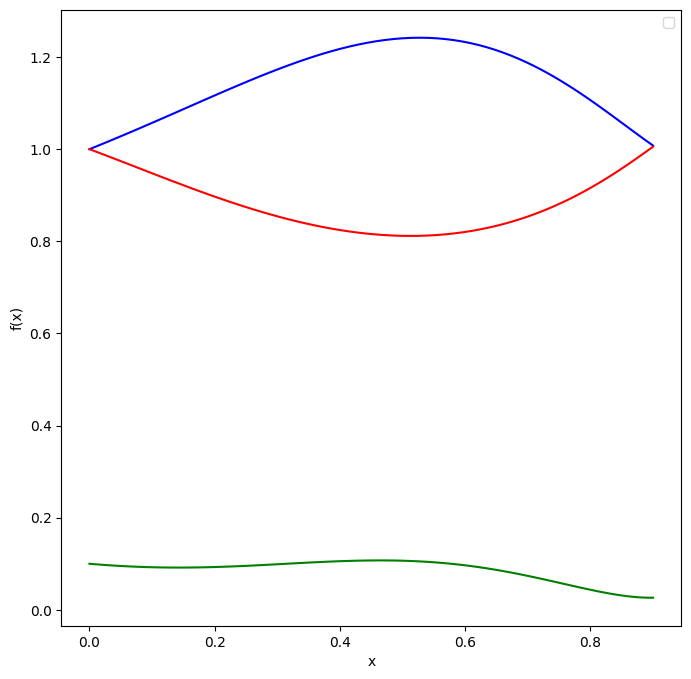

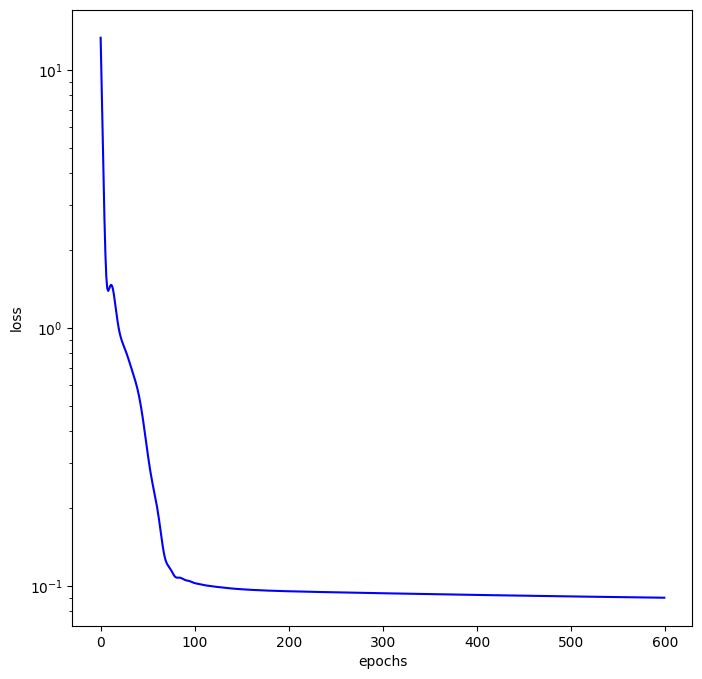

Best solution L_f:  0.09015237190432344


In [9]:
# Initialize the first pair as the optimal one
best_index = 0
best_L_f2 = L_f2[0]

# Loop through both lists
for i in range(1, len(L_f2)):  # Start from index 1
    # Check if all elements are lower than the current best
    if L_f2[i] < best_L_f2:  
        best_index = i
        best_L_f2 = L_f2[i]  # Update optimal pair

# Retrieve the best solution
best_solution, best_solution2, best_solution3 = all_functions[best_index]  # Unpack the tuple
best_losses = all_losses2[best_index]
# Plot the best solutions
plt.figure(figsize=(8, 8))
plt.plot(x_data, best_solution.flatten(), color="blue")
plt.plot(x_data, best_solution2.flatten(), color="red")
plt.plot(x_data, best_solution3.flatten(), color="green")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
#plt.savefig(f"best_f_x.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(best_losses, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log')
#plt.savefig(f"best_losses.png")
plt.show()

# Print results
print("Best solution L_f: ", best_L_f2)

In [10]:
print(best_index)

2


### Stats

In [11]:
L_f_threshold = 10**(-1)
#L_q_threshold = 10**(-4)

count = sum(1 for f in L_f2 if f < L_f_threshold)

print("Number of good solutions: ", count) 

Number of good solutions:  1
